💎 **Predicción de riesgo crediticio** <br>
👩🏻‍💻 **By:** Holguer Andrade Benavides <br>
🏆 **Bootcamp:** Inteligencia Artificial Nivel Innovador <br>
💾 **Dataset:** https://www.kaggle.com/datasets/lainguyn123/student-performance-factors <br>

# 🎮 Cargar librerias y dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Conectar a Google Drive y cargar dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Talento Tech/Proyecto/01_Regresión_nota_de_examen/student_performance_factors.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
display(df.head())

Mounted at /content/drive


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# 🎯 Análisis Exploratorio de Datos (EDA)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
# Detectar valores nulos
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [4]:
# Imputar valores nulos con la moda (for categorical columns)
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [5]:
# Detectar valores duplicados
df.duplicated().sum()

np.int64(0)

# ⚙️ Procesamiento de datos

In [6]:
# Definir las columnas numéricas
numeric_features = df.select_dtypes(include=['int64']).columns

# Definir las columnas categóricas
categorical_features = df.select_dtypes(include=['object']).columns

# Categóricas en números - LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

# Escalar numéricas - Normalización
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
df[numeric_features] = minmax_scaler.fit_transform(df[numeric_features])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,1,0,0,0.500000,0.46,1,1,0.000,1,2,1,2,0.500000,0,1,2,1,0.260870
1,0.418605,0.100,1,2,0,0.666667,0.18,1,1,0.250,2,2,1,0,0.666667,0,0,1,0,0.130435
2,0.534884,0.950,2,2,1,0.500000,0.82,2,1,0.250,2,2,1,1,0.666667,0,2,2,1,0.413043
3,0.651163,0.725,1,2,1,0.666667,0.96,2,1,0.125,2,2,1,0,0.666667,0,1,1,1,0.347826
4,0.418605,0.800,2,2,1,0.333333,0.30,2,1,0.375,2,0,1,1,0.666667,0,0,2,0,0.326087


# ✍️ Dividir los datos

In [7]:
# Dividir caracteristicas X y variable objetivo Y
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Construir la red neuronal

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definir el modelo de red neuronal secuencial
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # Capa de salida para regresión (una neurona sin activación para salida lineal)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])

# Mostrar un resumen del modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

# 🦾 Entrenar el modelo

In [9]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0107 - mae: 0.0719 - mse: 0.0107 - val_loss: 0.0071 - val_mae: 0.0520 - val_mse: 0.0071
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - mae: 0.0354 - mse: 0.0032 - val_loss: 0.0054 - val_mae: 0.0379 - val_mse: 0.0054
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - mae: 0.0291 - mse: 0.0024 - val_loss: 0.0060 - val_mae: 0.0516 - val_mse: 0.0060
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - mae: 0.0318 - mse: 0.0027 - val_loss: 0.0044 - val_mae: 0.0273 - val_mse: 0.0044
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mae: 0.0247 - mse: 0.0021 - val_loss: 0.0045 - val_mae: 0.0288 - val_mse: 0.0045
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mae: 0.0238 - mse: 0.0021 - val_loss: 0.0057 - val_mae: 0.0491 - val_mse: 0.0057
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - mae: 0.0324 - mse: 0.002

# ✅ Evaluar el modelo

In [10]:
# Evaluar el modelo en el conjunto de prueba
loss, mae, mse = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de prueba (MSE): {loss}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae}')
print(f'Error Cuadrático Medio (MSE) en el conjunto de prueba: {mse}')

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - mae: 0.0151 - mse: 0.0023
Pérdida en el conjunto de prueba (MSE): 0.0019325986504554749
Error Absoluto Medio (MAE) en el conjunto de prueba: 0.014287610538303852
Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.0019325986504554749


# 🔎 Realizar predicciones y visualizar resultados

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


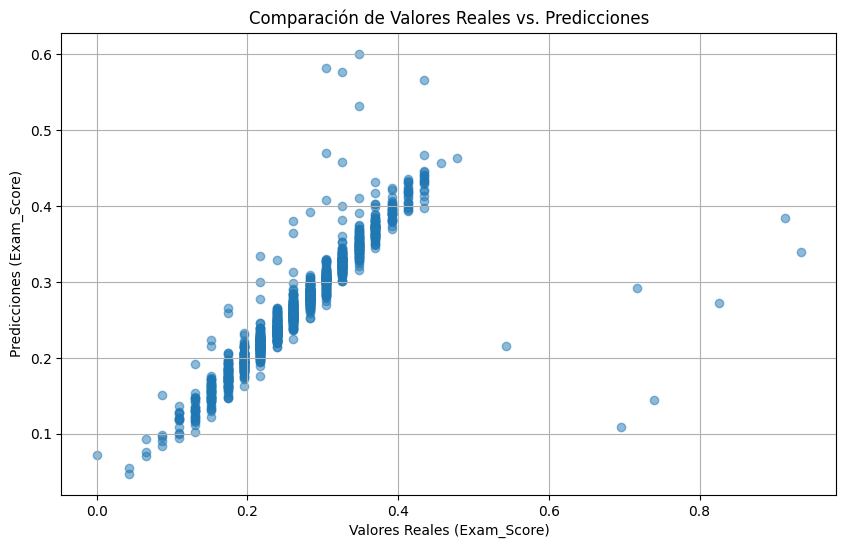

In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar predicciones con valores reales (visualización)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales (Exam_Score)")
plt.ylabel("Predicciones (Exam_Score)")
plt.title("Comparación de Valores Reales vs. Predicciones")
plt.grid(True)
plt.show()

# 🏆 Métricas de evaluación adicionales y análisis de errores

In [14]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Flatten y_pred to be 1D
y_pred_flat = y_pred.flatten()

# Calcular MSE (ya lo tenemos de la evaluación del modelo, pero lo volvemos a calcular para completitud)
mse = mean_squared_error(y_test, y_pred_flat)

# Calcular RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular R2 (Coefficient of Determination)
r2 = r2_score(y_test, y_pred_flat)

# Calcular MAE (Mean Absolute Error) (ya lo tenemos de la evaluación del modelo)
mae = mean_absolute_error(y_test, y_pred_flat)

# Calcular MAPE (Mean Absolute Percentage Error)
# Para evitar divisiones por cero si hay valores reales de 0, podemos añadir una pequeña constante.
# Sin embargo, dado que 'Exam_Score' parece ser una nota de examen, es poco probable tener 0.
# Si tuvieras valores reales de 0, considera cómo manejarlos (ej. excluir o añadir una constante).
mape = np.mean(np.abs((y_test - y_pred_flat) / y_test)) * 100


print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Coeficiente de Determinación (R2): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Porcentual Absoluto Medio (MAPE): {mape:.2f}%')

Error Cuadrático Medio (MSE): 0.0019325986636058523
Raíz del Error Cuadrático Medio (RMSE): 0.04396133145851991
Coeficiente de Determinación (R2): 0.7106927622772967
Error Absoluto Medio (MAE): 0.014287609767480202
Error Porcentual Absoluto Medio (MAPE): inf%


# 📊 Histograma de Errores

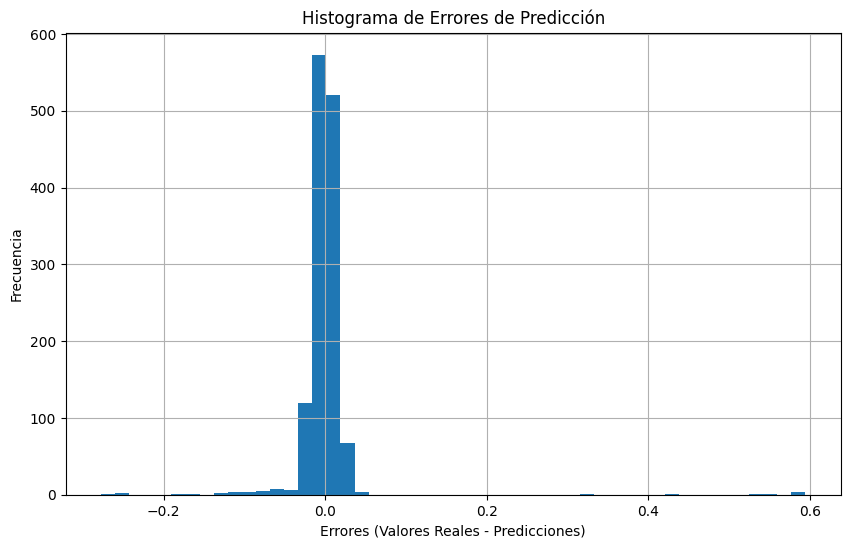

In [15]:
# Flatten y_pred to be 1D
y_pred_flat = y_pred.flatten()

# Calcular los errores
errors = y_test - y_pred_flat

# Crear el histograma de errores
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel("Errores (Valores Reales - Predicciones)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores de Predicción")
plt.grid(True)
plt.show()